In [15]:
!pip install gradio

In [30]:
import joblib
import gradio as gr
from tensorflow.keras.models import load_model
import io
import requests

In [38]:
# Load model nya
model_url = "https://raw.githubusercontent.com/ejapten/Analisis-Sentimen-Game-Getrich/main/deploy/model_sentimen.h5"
model_file = io.BytesIO(requests.get(model_url).content)
with open("/tmp/model_sentimen.h5", "wb") as f:
    f.write(model_file.getbuffer())

tfidf_url = "https://raw.githubusercontent.com/ejapten/Analisis-Sentimen-Game-Getrich/main/deploy/tfidf_vectorizer.pkl"
tfidf_file = io.BytesIO(requests.get(tfidf_url).content)
with open("/tmp/tfidf_vectorizer.pkl", "wb") as f:
    f.write(tfidf_file.getbuffer())
with open("/tmp/tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

label_url = "https://raw.githubusercontent.com/ejapten/Analisis-Sentimen-Game-Getrich/main/deploy/label_encoder.pkl"
label_file = io.BytesIO(requests.get(label_url).content)
with open("/tmp/label_encoder.pkl", "wb") as f:
    f.write(tfidf_file.getbuffer())
with open("/tmp/label_encoder.pkl", "rb") as f:
    tfidf = pickle.load(f)


In [40]:
model = load_model("/tmp/model_sentimen.h5")

In [41]:
# Fungsi prediksi
def prediksi_sentimen(teks):
    teks_tfidf = tfidf_vectorizer.transform([teks]).toarray()
    prediksi = model.predict(teks_tfidf)
    label_index = np.argmax(prediksi)
    label_kelas = label_encoder.inverse_transform([label_index])[0]
    return f"Sentimen: {label_kelas}"

# Interface Gradio
interface = gr.Interface(fn=prediksi_sentimen,
                         inputs=gr.Textbox(lines=3, placeholder="Masukkan kalimat review..."),
                         outputs="text",
                         title="Analisis Sentimen Review")

In [42]:
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fc5be849c9ec4efa1e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Netral

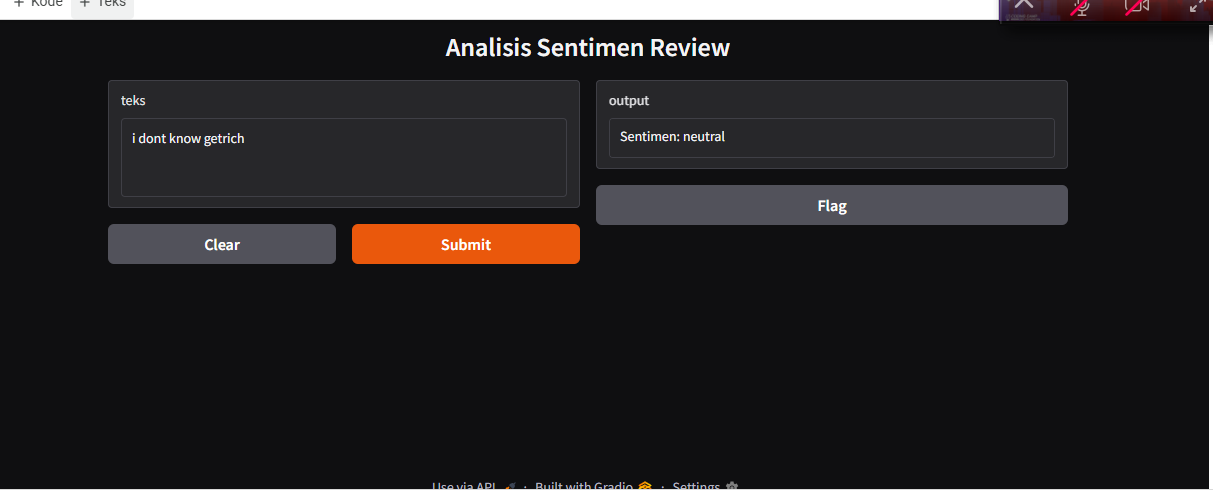

In [ ]:
# Positive

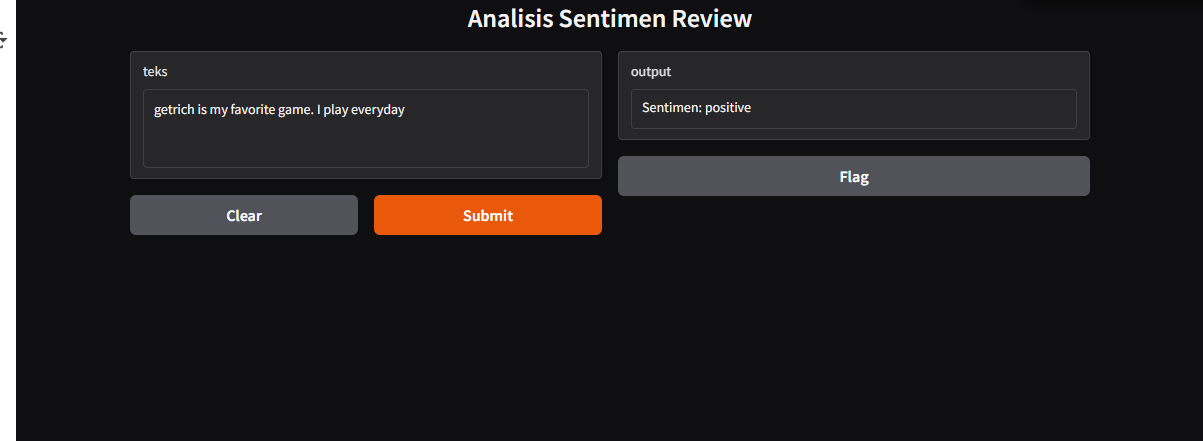

In [ ]:
# negative

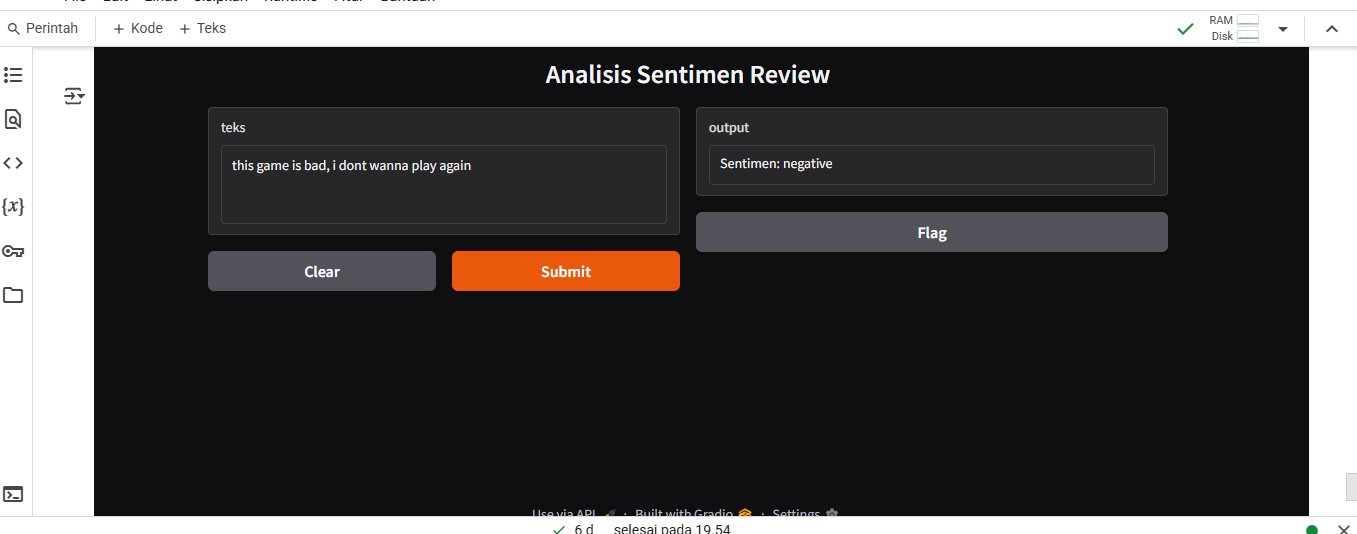